In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Loading the dataset
blogs_df = pd.read_csv('blogs.csv', encoding='ascii')

In [ ]:
# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the text data
blogs_df['cleaned_text'] = blogs_df['Data'].apply(preprocess_text)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(blogs_df['cleaned_text'], blogs_df['Labels'], test_size=0.2, random_state=42)

In [ ]:
# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Training the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Making predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Displaying the results
print('Accuracy:', accuracy)

Accuracy: 0.82


In [ ]:
print('Classification Report:\n', report)

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.65      0.83      0.73        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       0.95      0.80      0.87        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.94      0.88      

In [ ]:
%pip install --upgrade nltk textblob

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# Apply sentiment analysis
blogs_df['sentiment'] = blogs_df['Data'].apply(get_sentiment)

In [ ]:
# Summarize sentiment distribution
sentiment_distribution = blogs_df['sentiment'].value_counts()

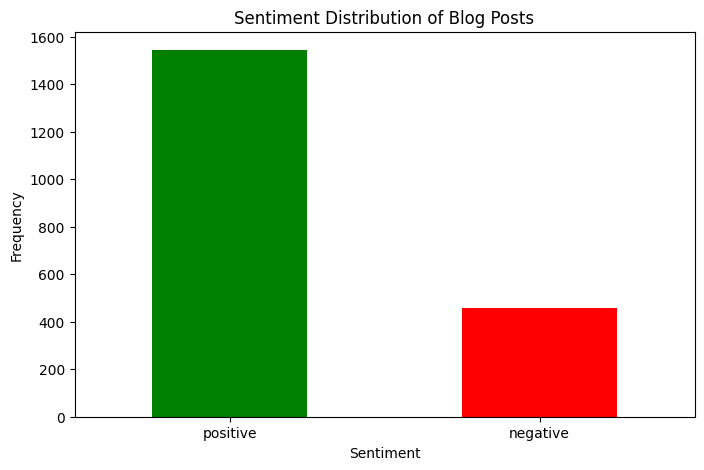

In [ ]:
# Plotting the sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.savefig('sentiment_distribution.png')
plt.show()